# Voorspellen gebruik van gas

## 1. Importen packages en dataframe

### 1.1 Packages

In [40]:
import pandas as pd
import numpy as np
import datetime as dt
import plotnine as p9
import matplotlib.pyplot as plt
#from plotnine import *
#from plotnine.data import *

%matplotlib inline

### 1.2 Ophalen data

In [128]:
df = pd.read_csv('c://users//iwan//documents/github//private//kerk//data//dataset.csv')
df['datetime'] = pd.to_datetime(df['datetime'], format="%d-%m-%Y")
df['date'] = pd.to_datetime(df['datetime'].dt.date)
df = df.drop(columns=['datetime'])
df.head(5)
backup = df.copy()

In [129]:
df = (
    df[['date', 'type', 'quantity']]
    .loc[lambda d: d['type'] =="gas"]
    .reset_index()
    .assign(usage=lambda d: d['quantity']-d['quantity'].shift(1))
    .drop(columns=['index', 'type'])
)

df.sample(5)

date  quantity  usage
241 2019-09-24   1223.90   0.00
16  2019-01-16    282.10  12.20
27  2019-01-27    458.04   5.24
168 2019-07-13   1221.84   0.00
21  2019-01-21    377.71  45.88

### 1.3 Definitions

In [130]:
def plot_line(x, y,title,color):
    return(
        p9.ggplot() + 
        p9.geom_line(data=df, 
                     mapping=p9.aes(x=x,
                                    y=y),
                     color=color) + 
        p9.labs(title=title) +
        p9.theme(figure_size=(8, 3),
               #  plot_title=element_text(weight='bold', size = 11),
               #  axis_title_x=element_text(weight='bold', size=9),
               #  axis_title_y=element_text(weight='bold', size=9),
                 axis_text_x=element_text(angle=45, size=7),
               #  axis_text_y=element_text(size=7)
                )
    )

In [131]:
def usage_mean(df):
    usage_mean=df['usage'].mean()
    return usage_mean
 
def usage_max(df):
    usage_ax=df['usage'].max()
    return usage_max

def usage_min(df):
    usage_min=df['usage'].min()
    return usage_min

# 2 Eerste inzichten

### 2.1 Gasverbruik per dag

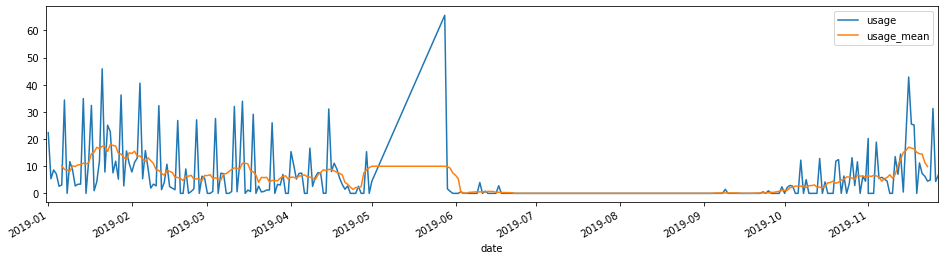

In [132]:
(
    df[['date', 'usage']]
    .set_index('date')
    .assign(usage_mean=lambda d: (d['usage']#.rolling("10D").mean())
                                  .rolling(10, center=True, win_type="gaussian")
                                  .mean(std=5)))
    .plot(figsize=(16, 4))
)

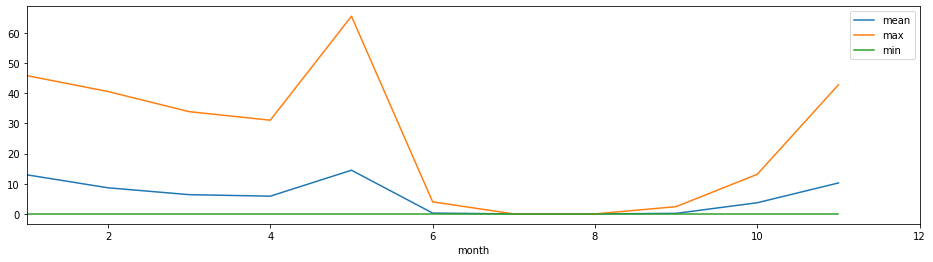

In [140]:
mean=(
    df
    .assign(month=lambda d: d['date'].dt.month)
    .groupby('month')
    .apply(lambda d: pd.Series({"mean": np.mean(d['usage'])}))
)

maximum=(
    df
    .assign(month=lambda d: d['date'].dt.month)
    .groupby('month')
    .apply(lambda d: pd.Series({"max": np.max(d['usage'])}))
)

minimal=(
    df
    .assign(month=lambda d: d['date'].dt.month)
    .groupby('month')
    .apply(lambda d: pd.Series({"min": np.min(d['usage'])}))
)

(
   mean
    .join(maximum)
    .join(minimal)
    .plot(figsize=(16, 4))
)

del mean
del maximum
del minimal

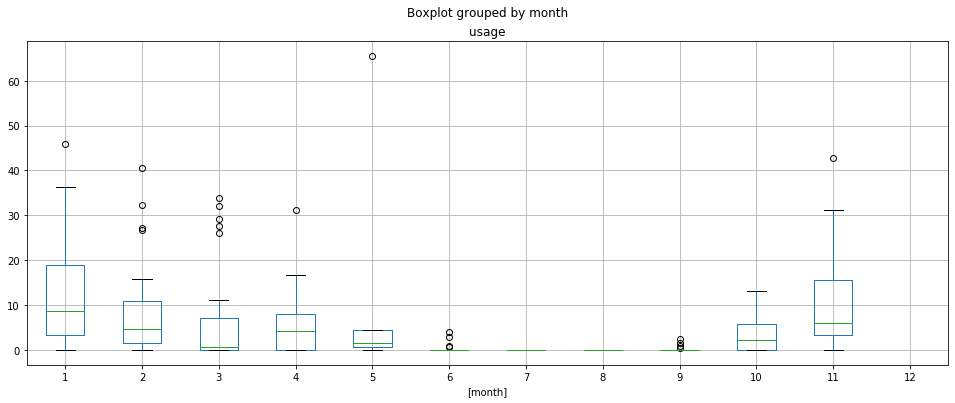

In [138]:
(
    df[['date', 'usage']]
    .assign(month=lambda d: d['date'].dt.month)
    .drop(['date'], axis=1)
    .boxplot(by=['month'], figsize=(16,6))
)

In [135]:
df_min=(
    df[['date','usage']]
    .loc[lambda d: d['usage'] > 0.5]
)
   
usage_summer = usage_min(df_min)
usage_summer

0.5299999999999727

In [136]:
df_test=(
    df
    .copy()
    .assign(usage_het = lambda d: d['usage'] - usage_summer)
    .loc[lambda d: d['usage'] >= 0]
)

In [137]:
df_test

date  quantity  usage  usage_het
1   2019-01-01    143.90  22.37      21.84
2   2019-01-02    149.27   5.37       4.84
3   2019-01-03    157.88   8.61       8.08
4   2019-01-04    165.02   7.14       6.61
5   2019-01-05    167.65   2.63       2.10
..         ...       ...    ...        ...
302 2019-11-23   1582.46   4.51       3.98
303 2019-11-24   1587.38   4.92       4.39
304 2019-11-25   1618.66  31.28      30.75
305 2019-11-26   1623.05   4.39       3.86
306 2019-11-27   1629.82   6.77       6.24

[306 rows x 4 columns]

In [145]:
df.sort_values(by='usage', ascending=False)

date  quantity  usage
122 2019-05-28   1211.20  65.58
21  2019-01-21    377.71  45.88
295 2019-11-16   1502.47  42.85
35  2019-02-04    596.61  40.61
28  2019-01-28    494.28  36.24
..         ...       ...    ...
176 2019-07-21   1221.84   0.00
177 2019-07-22   1221.84   0.00
178 2019-07-23   1221.84   0.00
154 2019-06-29   1221.84   0.00
0   2018-12-31    121.53    NaN

[307 rows x 3 columns]